In [36]:
%pylab inline
rcParams["figure.figsize"] = (20,5)
from glob import glob

import pandas as pd
from torch import nn
from torch.autograd import Variable

import os
import numpy as np
import pyworld
import pysptk
import librosa

import sys
import math
import torch
import pickle
from matplotlib import pyplot as plt
import Levenshtein

#load outputs
file = "./save/en_us_large/evaluations/test/activat_o0.attn"

with open(file, "rb") as pf:
    print("DEBUG: loading all stats from: ", file)
    outputs = pickle.load(pf)

source = outputs['source']
preds = outputs['preds']
alpha = outputs['alpha']
align = outputs['align']
activ_align = outputs['activ_align']
activ = outputs['activ']
embed_activ = outputs['embed_activ']
channels_cst = outputs['channels_cst']
per = outputs['PER']
gl = outputs['gl']

Populating the interactive namespace from numpy and matplotlib
DEBUG: loading all stats from:  ./save/en_us_large/evaluations/test/activat_o0.attn


/home/jaebok/miniconda3/envs/pytorch_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


source:  a c c e n t u a t e s 
prediction: & k . " s E n . tS u: . eI t s
label:  @ k . " s E n . tS u: . eI t s
phone distance:  1
(11, 14)


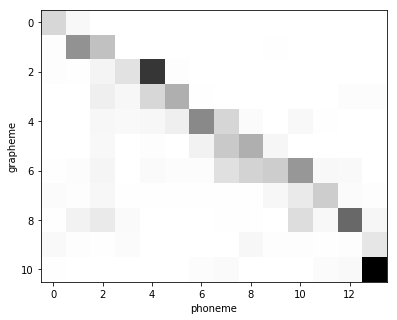

In [43]:
best_idx = 0
lowest = 100

#find best matching
for idx in range(0, 100):
    src = source[idx][0].split(" ")
    pred = preds[idx].strip().split(" ")
    dist = Levenshtein.distance(" ".join(pred), label)
    if dist < lowest:
        best_idx = idx

#visualising attention
print("source: ",  source[best_idx][0], "\nprediction:", preds[best_idx])
src = source[best_idx][0].split(" ")
pred = preds[best_idx].strip().split(" ")
a = activ_align[best_idx]
label = gl[best_idx]
print("label: ", label)
print("phone distance: ", Levenshtein.distance(" ".join(pred), label))

grid = np.zeros((len(src), len(pred) ))
print(grid.shape)

for i in range(0, len(src)):
    for j in range(0, len(pred)):
        grid[i][j] = a[j][0][i]

plt.imshow(grid, interpolation='none', cmap='Greys')
plt.ylabel('grapheme')
plt.xlabel('phoneme')
plt.show()
